#  Kid's drawings

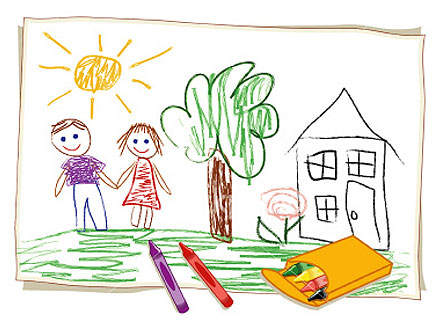

In this project we will build a function that receives a number of drawings and returns:
1. How many lines are there in the drawing.
2. What is the length of each line and what is the average pressure applied to each line.
3. How much hand raising is there in the drawing.
4. Is the shape in the painting open or closed.

### Let's look at the data we have about each drawing:

1. picture of the drawing.
2. table with several columns:
    * X-Y: Represent a dot on the drawing.
    * Pressure: Press the pen on the page at any point.
    * TiltX, TiltY: Pen position on the dot.
    * Time: The time you drew the drawing.
    * At the end of each table there is the time when they started drawing and the time when the drawing was completed.

#### Import the needed libraries for the project:

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import os
from PIL import Image
from tabulate import tabulate
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

#### Asks to enter a number of file and number of drawing:

In [2]:
file=input("Enter a number of file:")
image=input("Enter a number of drawing(Between 1 and 21):")

Enter a number of file:7554
Enter a number of drawing(Between 1 and 21):5


#### We will put the table in the variable 'df' and the image in the variable 'img':

In [3]:
st_img="C:/Users/user/Desktop/תואר ראשון מדמח/שנה א/סמסטר ב/הדמיית נתונים/data/train/"+file+"/SimpleTest/"+image+".png"
st_table="C:/Users/user/Desktop/תואר ראשון מדמח/שנה א/סמסטר ב/הדמיית נתונים/data/train/"+file+"/SimpleTest/"+image+".csv"
df=pd.read_csv(st_table)
img = Image.open(st_img)

###  Opening the image and  the table:

In [4]:
img.show()
df

X           Y   Pressure  \
0                                    608.351079801363  833.323017   0.107164   
1                                    608.877699503407  833.165031   0.107164   
2                                    608.877699503407  833.165031   0.099107   
3                                     609.03568541402  833.323017   0.107652   
4                                    608.719713592794  833.586326   0.129381   
..                                                ...         ...        ...   
500                                  686.132809793279  654.061670   0.507561   
501                                  686.132809793279  654.061670   0.490227   
502                                  686.448781614505  653.903684   0.478019   
503  Time Elapsed till drawing started: 00:02.7272871         NaN        NaN   
504   Time Elapsed till drawing submit: 00:18.2575765         NaN        NaN   

      TiltX   TiltY           Time  
0   -3848.0  -644.0  00:02.7272871  
1   -3848.0  -644.0  00:02.7429109  
2   -3848.0  -644.0  00:02.7585749  
3   -3959.0  -670.0  00:02.7741475  
4   -4059.0  -694.0  00:02.7898665  
..      ...     ...            ...  
500 -3717.0  1573.0  00:16.4733589  
501 -3717.0  1573.0  00:16.4891290  
502 -3717.0  1573.0  00:16.5046050  
503     NaN     NaN            NaN  
504     NaN     NaN            NaN  

[505 rows x 6 columns]

### We will go over the data and arrange them

#### Types of variables:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          505 non-null    object 
 1    Y         503 non-null    float64
 2    Pressure  503 non-null    float64
 3    TiltX     503 non-null    float64
 4    TiltY     503 non-null    float64
 5    Time      503 non-null    object 
dtypes: float64(4), object(2)
memory usage: 23.8+ KB


#### Keep in "rows" the number of rows in the table:

In [6]:
rows=df.shape[0]
rows

505

#### The last two lines are summary lines and not part of the data we need, so we will download them:

In [7]:
df=df.drop(rows-1)
df=df.drop(rows-2)
df

X           Y   Pressure   TiltX   TiltY           Time
0    608.351079801363  833.323017   0.107164 -3848.0  -644.0  00:02.7272871
1    608.877699503407  833.165031   0.107164 -3848.0  -644.0  00:02.7429109
2    608.877699503407  833.165031   0.099107 -3848.0  -644.0  00:02.7585749
3     609.03568541402  833.323017   0.107652 -3959.0  -670.0  00:02.7741475
4    608.719713592794  833.586326   0.129381 -4059.0  -694.0  00:02.7898665
..                ...         ...        ...     ...     ...            ...
498  686.132809793279  654.061670   0.507561 -3717.0  1573.0  00:16.4421005
499  686.132809793279  654.061670   0.507561 -3717.0  1573.0  00:16.4578282
500  686.132809793279  654.061670   0.507561 -3717.0  1573.0  00:16.4733589
501  686.132809793279  654.061670   0.490227 -3717.0  1573.0  00:16.4891290
502  686.448781614505  653.903684   0.478019 -3717.0  1573.0  00:16.5046050

[503 rows x 6 columns]

####  We will changing the time column from 'object' type to 'float' type:

In [8]:
for num in range(0,rows-2):
    if (type(df.iloc[num,5])=='float'):
        x=0;
    else:
        T=df.iloc[num,5].split(":")
        T=T[1]
        df.iloc[num,5]=T

df.iloc[:,5] = df.iloc[:,5].astype('float')

####  We will changing the X and Y columns from 'string' type to 'float' type

In [9]:
# X columns
for num in range(0,rows-2):
    if (type(df.iloc[num,0])=='float'):
        x=0;
    else:
        T=df.iloc[num,0]
        df.iloc[num,0]=float(T)

# Y columns
for num in range(0,rows-2):
    if (type(df.iloc[num,1])=='float'):
        x=0;
    else:
        T=df.iloc[num,1]
        df.iloc[num,1]=float(T)

df.iloc[:,0] = df.iloc[:,0].astype('float')
df.iloc[:,1] = df.iloc[:,1].astype('float')

####  We will check that the types of columns have changed:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 0 to 502
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          503 non-null    float64
 1    Y         503 non-null    float64
 2    Pressure  503 non-null    float64
 3    TiltX     503 non-null    float64
 4    TiltY     503 non-null    float64
 5    Time      503 non-null    float64
dtypes: float64(6)
memory usage: 27.5 KB


### graph viewing

In [11]:
ymin = -df[' Y'].min()-400
ymax = -df[' Y'].max()+400
xmin = df['X'].min()-400
xmax = df['X'].max()+400

(206.19193902298196,
 1138.6367940870769,
 -896.813026908419,
 -433.58632636563095)

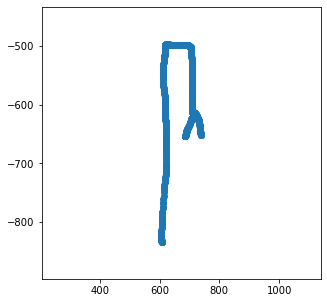

In [12]:
plt.figure(figsize=(5,5))
plt.plot(df['X'],-df[' Y'],'o')
plt.gca().invert_yaxis()
plt.axis([xmin,xmax,ymin,ymax])

## Answers: 

### 1-2. Check how many different lines there are, what is the length of each and what is the average pressure applied to each line in the drawing:

In [13]:
#A function that checks the length of the line:
def lines_distans(prev,i):
    x1=df.loc[prev,'X']
    x2=df.loc[i,'X']
    y1=df.loc[prev,' Y']
    y2=df.loc[i,' Y']
    
    d=((((x2-x1)**2)-((y2-y1)**2))**0.5)
    return d

#A function that checks the average pressure of the pen on the line:
def average_pressure(prev,i):
    pressure=0.0
    for num in  range(prev,i+1):
        pressure=pressure+df.loc[num,' Pressure']
    pressure=pressure.mean()
    
    return pressure

In [14]:
I_Jump = 10

#A function that checks how many lines there are and in addition calls the two previous function
#to check length and mean pressure
def lines_cords(df):
    slp = ((df.loc[1,' Y']-df.loc[0,' Y'])/(df.loc[1,'X']-df.loc[0,'X']))
    lines = []
    start = 0
    end = 0
    current_slp = slp
    while (end+I_Jump)<len(df):
        if (df[' Y'][end]!= df[' Y'][end+I_Jump]) & (df['X'][end]!= df['X'][end+I_Jump]):
            current_slp = (df[' Y'][end+I_Jump]-df[' Y'][end])/(df['X'][end+I_Jump]-df['X'][end])    
        if (current_slp<=slp+0.5) & (current_slp>=slp-0.5) :
            slp = current_slp
        else:
            if end-start>60:
                d=lines_distans(start,end)
                a=average_pressure(start,end)
                lines.append({ 'start' : start, 'end' : end, 'length': d,'average pressure': a})
                start = end                    
        slp = current_slp
        end+=1
    
    return lines

In [15]:
lines=lines_cords(df)
print(lines)
print(" ")
print("There are "+str(len(lines))+" lines in drawing")

[{'start': 0, 'end': 61, 'length': nan, 'average pressure': 30.17724853008985}, {'start': 61, 'end': 122, 'length': nan, 'average pressure': 37.51622849702835}, {'start': 122, 'end': 259, 'length': 79.38195936274731, 'average pressure': 86.53632462024689}, {'start': 259, 'end': 320, 'length': nan, 'average pressure': 39.05409401655197}, {'start': 320, 'end': 403, 'length': nan, 'average pressure': 25.73104445636272}, {'start': 403, 'end': 492, 'length': 46.0235491615258, 'average pressure': 35.510155126452446}]
 
There are 6 lines in drawing


### 3. Count how many hand raising were in each drawing:

In [16]:
df_time=df.iloc[:,5]
count=0
for num in range(0,rows-3):
    x=df_time.loc[num]
    y=df_time.loc[(num+1)]
    d=y-x
    if d>=0.1:
        count=count+1
count=str(count)
st="There are "+count +" hand raising in the drawing"
print(st)

There are 2 hand raising in the drawing


### 4. Check if the shape is open or closed:

In [17]:
epsilon=5
second=0.4
isOpen='true'
num=int(rows/2)

for i in range(0,num):
    j=num
    sx=df['X'][i]
    sy=df[' Y'][i]
        
    while (j<rows-3):
        ex=df['X'][j]
        ey=df[' Y'][j]
        if(math.dist([sx,sy],[ex,ey]) < epsilon):
            if(df[" Time"][j] - df[" Time"][i] >second ):
                print("The shape is closed")
                isOpen='false'
                break
        j+=1
    if(isOpen=='false'):
           break

if(isOpen=='true'):
    print("The shape is open") 

The shape is open
